In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json

from astropy.io import fits
import astropy.units as u

from rebin_utils import downsample, oversample
from astropy.modeling import models, fitting
fitter = fitting.LevMarLSQFitter()

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'TAURUS-604-Ha-'

In [8]:
name_export='TAU-N604-H'

In [9]:
flux_in = data_file + 'Flux.fits'
radial_velocity_in = data_file + 'RV.fits'
sigma_in = data_file + 'Sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
distance = 840000 #parsecs
pix = 0.26 #arcsec 
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = distance*(2*np.pi) / (360 * 60 * 60) #arcsec to parsecs
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(4.072434921320102, 1.5563445559185105)

Flux map

Text(0.5, 1.0, 'H$_{α}$ Flux')

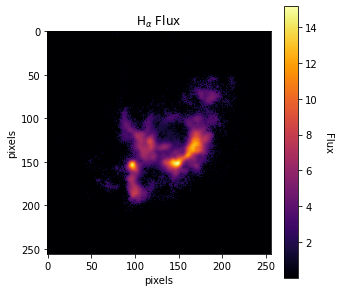

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

image_data=flux[0].data

plt.imshow(image_data, cmap='inferno')

ax.set_xlabel('pixels')
ax.set_ylabel('pixels')

cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15) 

plt.title('H$_{α}$ Flux')

sb

In [14]:
from sbfluct import sbfluct

0.533348196828465


C:\Users\ZAINTEL2\Documents\Aeon\GitHub\PhD.Paper\observations-to-velocity-fields\rebin_utils.py:129: RuntimeWarning: invalid value encountered in true_divide
  (


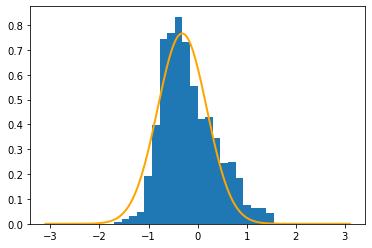

In [15]:
sbfluct(flux[0].data, 1e-8, 2, "604")

In [16]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.242006540298462 seconds ---
